# Network Notes

In [221]:
# good 160 unit *3 network
network_model = "d2-3200-v1-1-1"
iter1 = 1910
iter2 = 1980
codec = 3200
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



Training Iteration 1983 
using full set of frames 
Training Iteration 1984 
using full set of frames 
Training Iteration 1985 
using full set of frames 
Training Iteration 1986 
using full set of frames 
Training Iteration 1987 
using full set of frames 
Interrupt signal caught. Closing gracefully. 
saving config 

'


In [222]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


shuffle :  False
gen_every_nth :  10
learn_next_step :  True
optimizer :  {'params': {}, 'name': 'RMSprop'}
stateful :  False
model_filename :  out/d2-3200-v1-1-1/model-1987.h5
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
save_model_every_nth :  10
seq_step :  200
framelen :  13
start_iteration :  1987
fit_batch_size :  100
generate_len :  200
num_iterations :  2400
seed_seq_len :  200
test_data_fn :  test/criticalpracticalreason.c2-3200
limit_frames :  0
frame_seq_len :  200


In [236]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

The network _d2-3200-v1-1-1_ uses 3200 bit rate Codec 2. 

The network has eventually arrived at 5 LSTMs of 160 timesteps. One benefit of the 3200 bit rate codec
is that there is only one 'voiced' bit per frame, reducing the number of properties to be learned to 13. 

From a learning perspective, having a single voicing bit also should be easier, since every 
property has exactly one frame scope. With the 1300 bit rate codec there are 4 voiced bits per frame,
requiring learning of timed relationships within a single frame.

The best loss achieved is at around frame 1910, measuing ~0.41

Just after iteration 1910 the loss starts to jump to around 5. Looking at the parameter plots, it seems
that the generator has got stuck just producing a suboptimal mean. Stepping back to just before this and the 
audio results are reasonable.



In [224]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_2 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_3 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_4 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_5 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

dense_1 : Dense
trainable?  True
13 units
relu activation
 dropout
stateful 



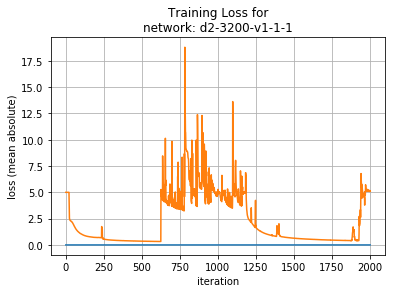

In [225]:
nd.plot_training_loss(network_model)

In [226]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    latest_iter = (int(f.readlines()[0]))
    print(latest_iter)
    
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])


0,5.10409369877
0,5.18097883665
0,5.08809120148
0,5.12474688665
0,5.14531098805
0,5.11986031357
0,5.09562066557
0,5.16760720738
0,5.07800051178
0,5.0900749695

1987


2

In [227]:
try:
  print("Latest Iteration:", latest_iter)
  nd.plot_codec_params(network_model,latest_iter, scale_up='orig')
except FileNotFoundError:
    print("File not found")

Latest Iteration: 1987
File not found


In [228]:
print(latest_iter)
print(home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav")
try:
  nd.plot_audio_waveform(network_model, latest_iter)
  display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(latest_iter)+codec_sub+".wav"))
except FileNotFoundError:
  print("file not found")
print()

1987
/home/phil/store/c2gen/out/d2-3200-v1-1-1/out-c2cb-1987-3200.wav
file not found



Early Iterations
===

3200 rate codec



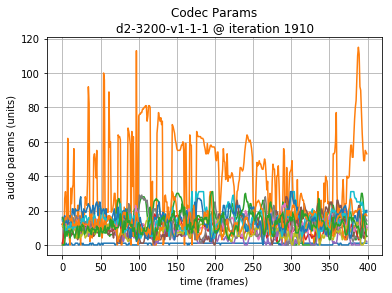

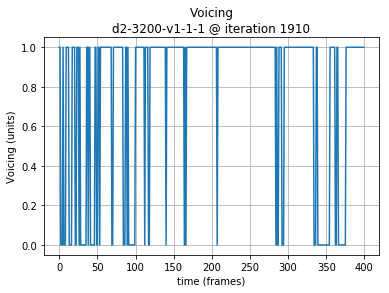

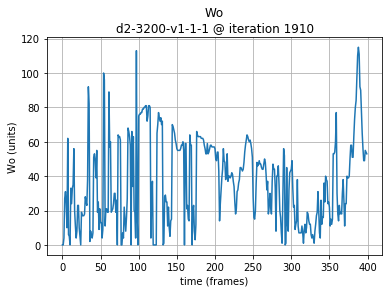

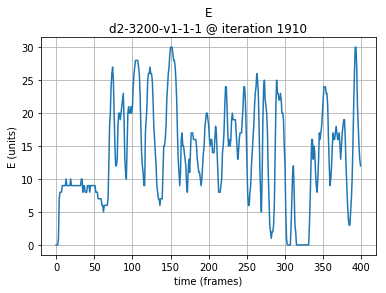

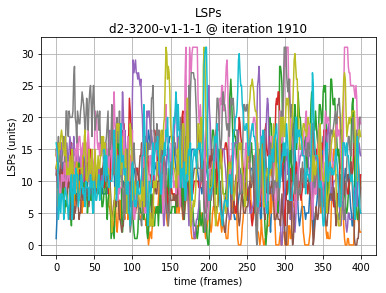

In [229]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

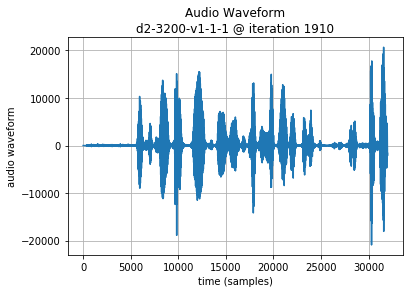

In [230]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [231]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

3200 rate codec



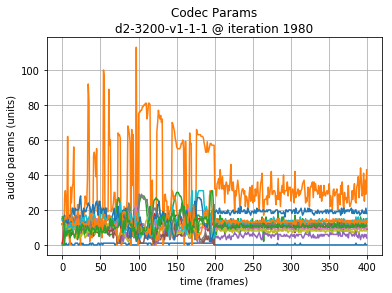

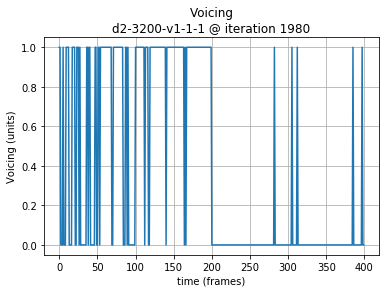

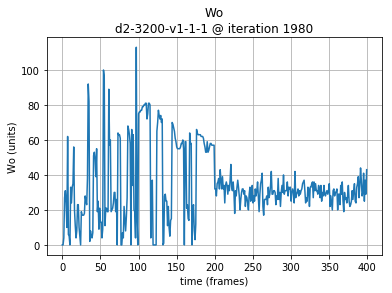

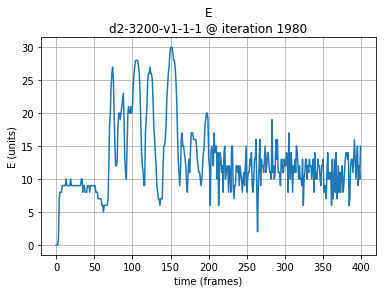

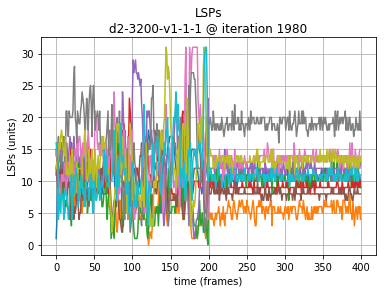

In [232]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

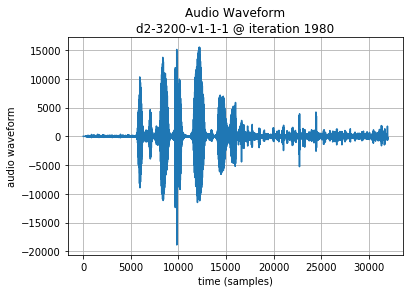

In [233]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [234]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))